In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import font_manager, rc


import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='NanumBarunGothic') 

#data import
main_df=pd.read_csv("/content/netflix_titles.csv")
print(main_df.info())






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


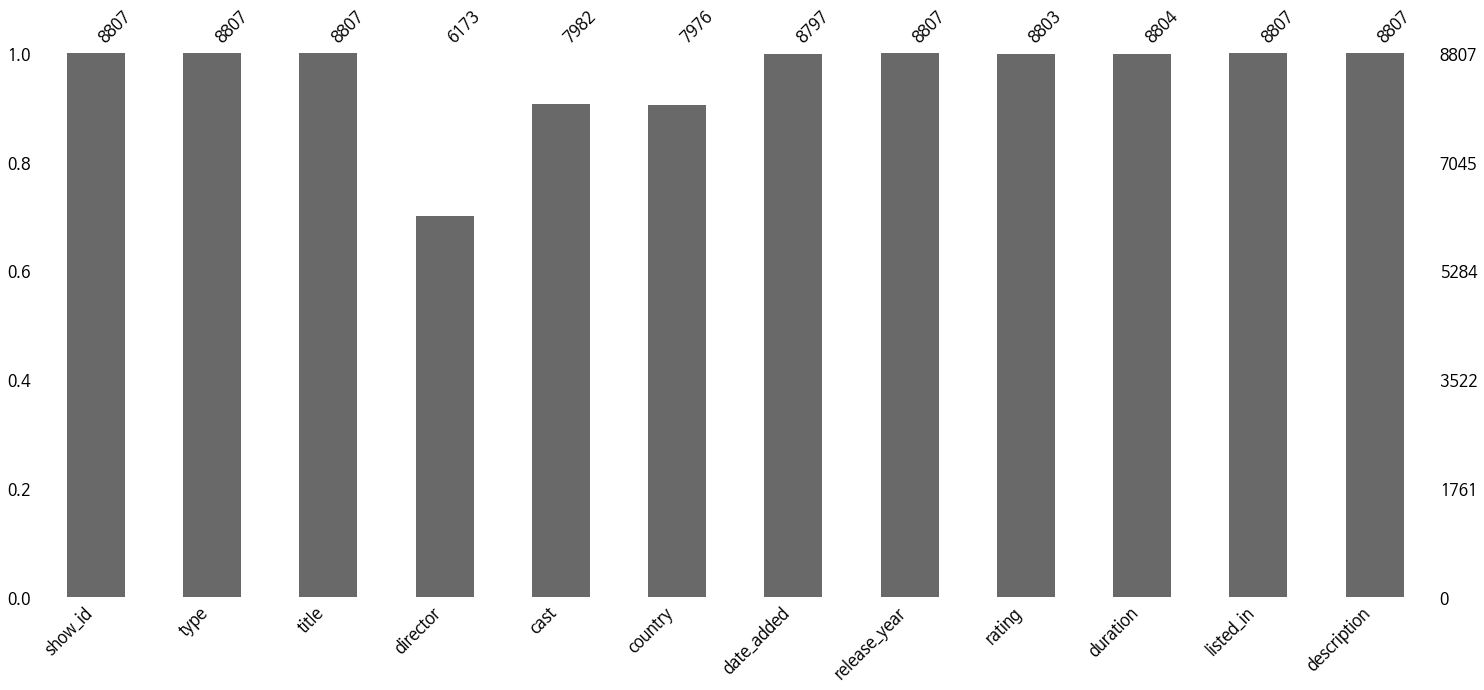

In [3]:
#결측치 데이터 표로 확인
msno.bar(main_df)

In [4]:
#결측치 데이터 숫자로 확인
main_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
#데이터 처리에 필요가 없는 director와 cast, duration을 drop한다.
main_df = main_df.drop(['director', 'cast'], axis=1)
main_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#duration 칼럼또한 drop해 데이터를 처리한다.
main_df = main_df.drop(['duration'], axis=1)

In [7]:
#date_added 칼럼의 빈 데이터는 삭제해서 처리한다.
main_df=main_df[main_df["date_added"].notna()]
main_df.isna().sum()

show_id           0
type              0
title             0
country         830
date_added        0
release_year      0
rating            4
listed_in         0
description       0
dtype: int64

In [8]:
#country칼럼의 결측치를 가장 많이 있는 값으로 채운다

main_df['country'] = main_df['country'].fillna(main_df['country'].mode()[0])
main_df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          4
listed_in       0
description     0
dtype: int64

In [9]:
#rating의 결측치를 채워넣는 과정을 진행하기전 rating이 Nan인 데이터의 id값을 확인한다.
main_df[main_df.rating.isnull()]


,show_id,type,title,country,date_added,release_year,rating,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,United States,"January 26, 2017",2017,NaN,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,Dramas,"Amid the chaos and horror of World War II, a c..."


In [10]:
main_df['rating'] = main_df['rating'].fillna("PG-13")
main_df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
description     0
dtype: int64

In [11]:
# year 컬럼 추가 
main_df['year'] = main_df['date_added'].apply(lambda x: x.split(" ")[-1])

# month 컬럼 추가 
main_df['month'] = main_df['date_added'].apply(lambda x: x.split(" ")[0])

# 데이터 확인
main_df.head()

,show_id,type,title,country,date_added,release_year,rating,listed_in,description,year,month
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",2021,September
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September


In [12]:
#관람등급에 관련된 칼럼을 target칼럼으로 설정해 추가한다.
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

main_df['target'] = main_df['rating'].replace(ratings)
main_df['target'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min'], dtype=object)

In [13]:
#필요한 데이터 타입들을 변경해준다.

# type -> category
main_df['type'] = pd.Categorical(main_df['type'])

# target -> category
main_df['target'] = pd.Categorical(main_df['target'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# year -> integer
main_df['year'] = pd.to_numeric(main_df['year'])

main_df.dtypes

show_id           object
type            category
title             object
country           object
date_added        object
release_year       int64
rating            object
listed_in         object
description       object
year               int64
month             object
target          category
dtype: object

In [41]:
#전처리 과정을 마친 데이터 정보
print(main_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8797 non-null   object  
 1   type          8797 non-null   category
 2   title         8797 non-null   object  
 3   country       8797 non-null   object  
 4   date_added    8797 non-null   object  
 5   release_year  8797 non-null   int64   
 6   rating        8797 non-null   object  
 7   listed_in     8797 non-null   object  
 8   description   8797 non-null   object  
 9   year          8797 non-null   int64   
 10  month         8797 non-null   object  
 11  target        8794 non-null   category
dtypes: category(2), int64(2), object(8)
memory usage: 773.5+ KB
None


In [14]:
#데이터 시각화할때 직관적으로 이해 가능 하도록 한다.
df_tv = main_df[main_df["type"] == "TV Show"]
df_movies = main_df[main_df["type"] == "Movie"]


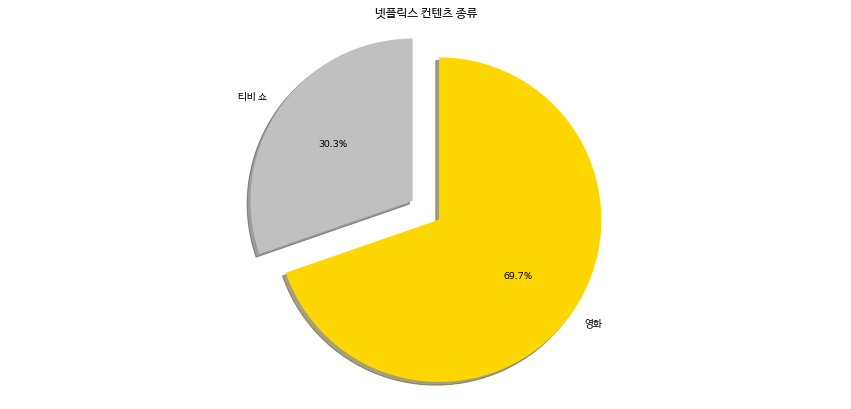

In [15]:
plt.figure(figsize=(15, 7))
labels=['티비 쇼', '영화']
plt.pie(main_df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%.1f%%',colors=['silver','gold'],shadow=True, startangle=90)
plt.title('넷플릭스 컨텐츠 종류')
plt.axis('equal')
plt.show()

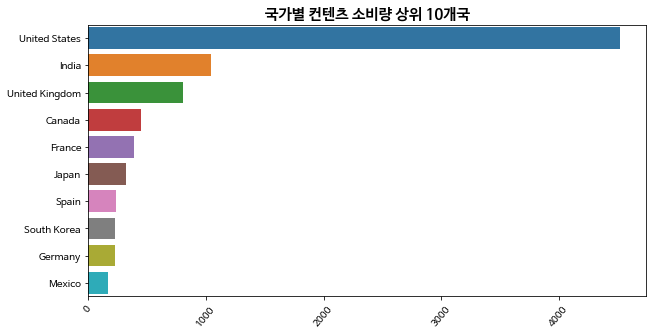

In [16]:
from collections import Counter
country_data = main_df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top10 = country_count.head(10)

plt.figure(figsize=(10,5))
sns.barplot(x= top10, y=top10.index, orient='h')
plt.xticks(rotation=50)
plt.title('국가별 컨텐츠 소비량 상위 10개국', fontsize=15, fontweight='bold')
plt.show()

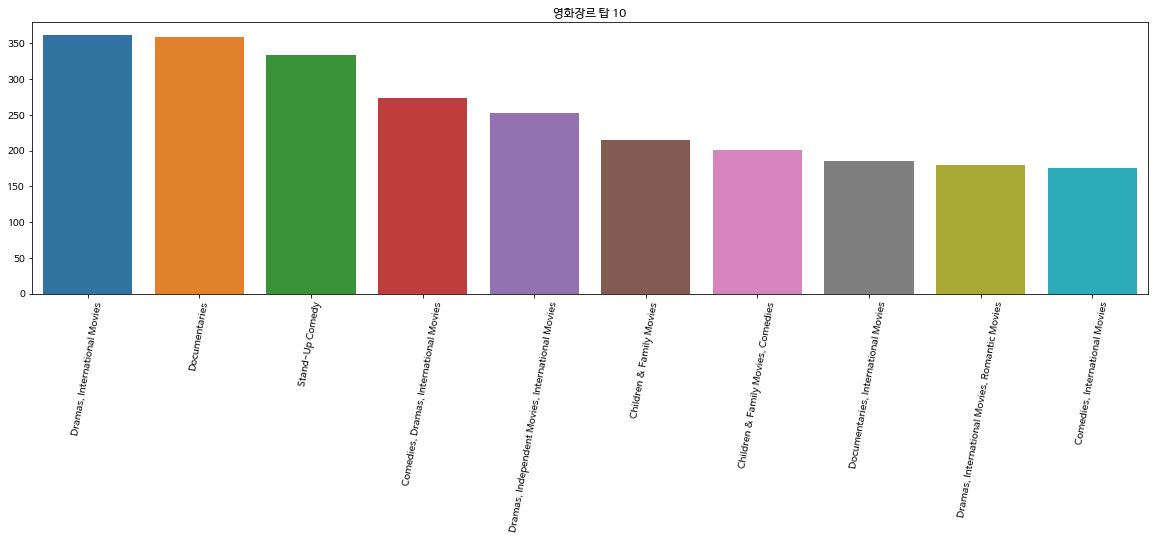

In [30]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values)
plt.xticks(rotation=80)
plt.title('영화장르 탑 10')
plt.show()

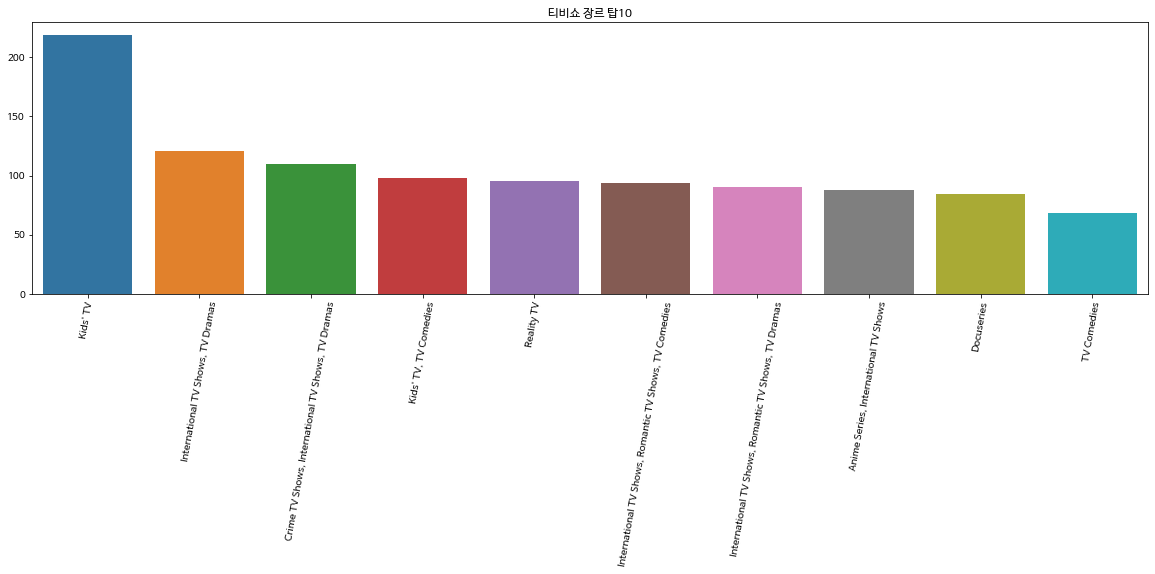

In [33]:
plt.figure(figsize=(20,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values)
plt.xticks(rotation=80)
plt.title("티비쇼 장르 탑10")
plt.show()

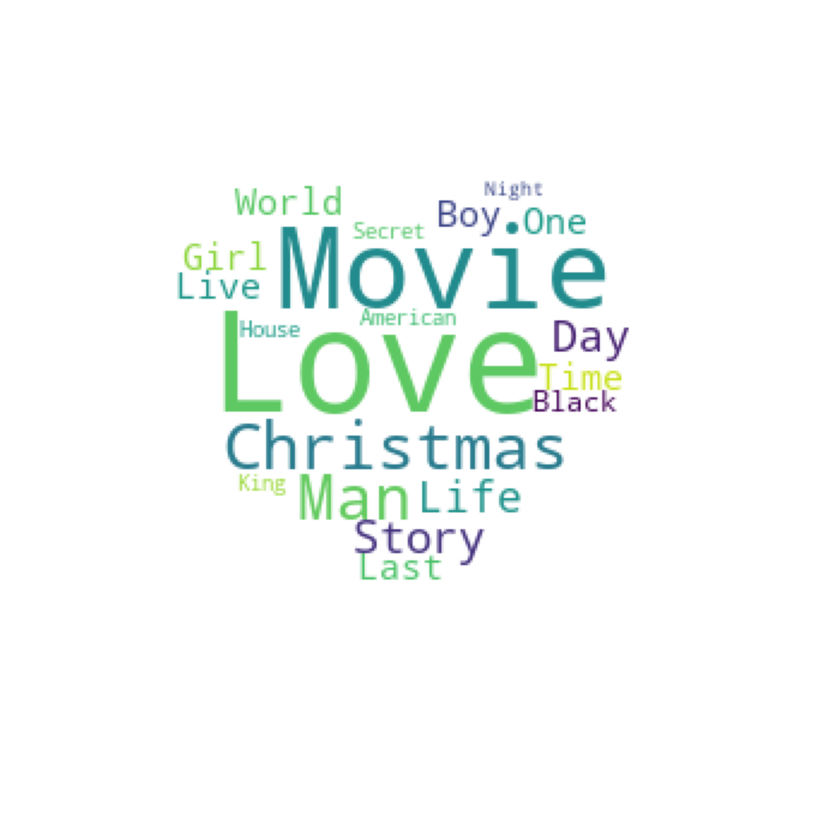

In [39]:
from wordcloud import WordCloud
from PIL import Image
text = ' '.join(df_movies['title'])
im = Image.open('heart.jpg') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20,mask = mask_arr,
                      prefer_horizontal = True).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

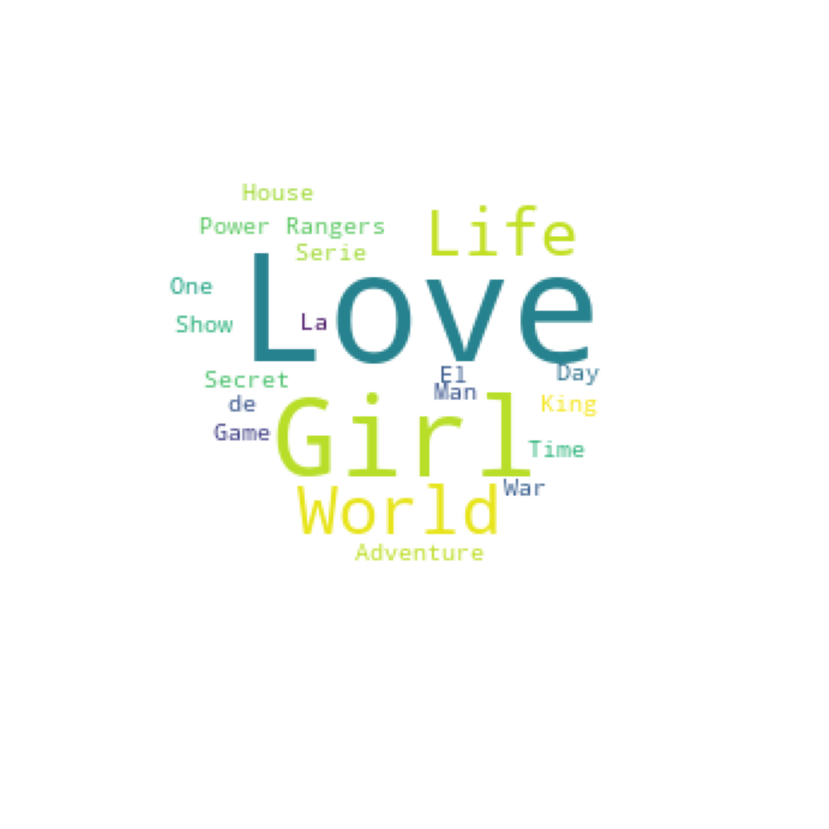

In [40]:
from wordcloud import WordCloud
from PIL import Image
text = ' '.join(df_tv['title'])
im = Image.open('heart.jpg') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20,mask = mask_arr,
                      prefer_horizontal = True).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()